# Fraud Detection In Wine Dataset using SVM with Grid Search and Deep Learning

In [1]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Victor Chow

**Course:** CISB 60 – ML and DL (Fall, 2024)

### Project Description
* This project is about applying machine learning methods to detect fraud in wine. This is a classification project where we first train the machine using Support Vector Machines (SVM) with hyperparameter tuning to identify whether an wine is "Legit" or "Fraud" based on the characteristic of the wine. Then, we will run the data through neural network and compare the result between SVM and nural network using confusion matrix.

Dataset Set Description: wine_fraud.csv
This dataset includes 13 columns and is from Kaggle.com
https://www.kaggle.com/datasets/asmaabdolahpoor/wine-fraud/data
It includes the type of wine (red or white) and the quality, that is, the classification of the wine (Legit or Fraud).
    
    
* **Keywords:** Wine Fraud Detection, Wine, SVM, consumer 
	

### Required packages

* Add instructions to install the required packages


In [2]:
import pandas as pd #for EDA
import numpy as np #for EDA
import warnings #ignore warning in juypter notebook
import seaborn as sns #for visual plot
import matplotlib.pyplot as plt #for ploting
import tensorflow as tf #for deep learning and using Keras
from sklearn.model_selection import train_test_split #for machine learning
from sklearn.preprocessing import StandardScaler #for standardize features  
from sklearn.svm import SVC #Support Vector Machines
from sklearn.model_selection import GridSearchCV #for search for best hyperparmeters
from sklearn.metrics import classification_report, confusion_matrix #for metric to mearch perforamnce
from tensorflow.keras.models import Sequential #create a linear stack of layers for building neural networsk
from tensorflow.keras.layers import Dense, Dropout, Input #for layer types
from tensorflow.keras.optimizers import Adam #Adaptive Moment Estimation


### Methodology

1. Explan your ML and DL metodology



2. Introduce the topics you used in your project
 * Model 1
    * Support Vector Machine supervised machine learning algorithm for classificaiton. Find the optimal hyperplane that best separate data points of different classes in a high-dimensional space. 
 
 * Model 2
    * Neural Network - computation model inspired by the way biological neural networks in the human brain process information.
 

### Your code starts here

Exploratory Data Analysis (EDA)

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('data/wine_fraud.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
#review the quality column to see what value it has
unique_quality = df['quality'].unique()               
print(unique_quality)

['Legit' 'Fraud']


In [5]:
#count how many are legit and how many are fraud
df['quality'].value_counts()
    

Legit    6251
Fraud     246
Name: quality, dtype: int64

In [6]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

Legit    6251
Fraud     246
Name: quality, dtype: int64

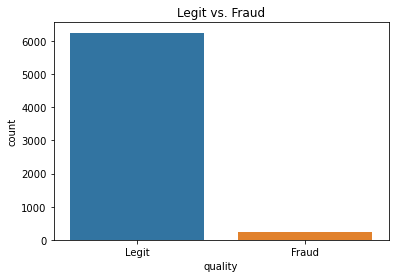

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Legit vs. Fraud')
sns.countplot(data=df, x='quality')
df['quality'].value_counts()


<AxesSubplot:title={'center':'Red or Write by Legit or Fraud'}, xlabel='type', ylabel='count'>

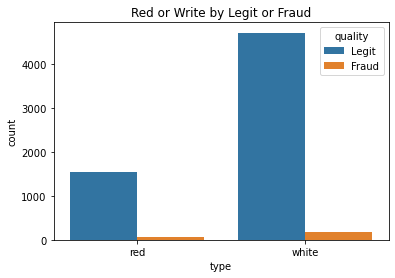

In [8]:
plt.title('Red or Write by Legit or Fraud')
sns.countplot(data=df, x='type', hue='quality')


In [9]:
red_wine = df[df['type'] == 'red']
red_fraud_percentage = (red_wine['quality'].value_counts().get('Fraud', 0) / len(red_wine)) * 100

white_wine = df[df['type'] == 'white']
white_fraud_percentage = (white_wine['quality'].value_counts().get('Fraud', 0) / len(white_wine)) * 100

print(f"Percentage of Fraud for Red Wine: {red_fraud_percentage:.2f}%")
print(f"Percentage of Fraud for White Wine: {white_fraud_percentage:.2f}%")


Percentage of Fraud for Red Wine: 3.94%
Percentage of Fraud for White Wine: 3.74%


In [10]:
# Convert the target variable quality from "Legit" and "Fraud" to 0 and 1, respectively, for the classification task.
df['quality'] = df['quality'].replace({'Legit': 0, 'Fraud': 1})
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red


In [11]:
#Convert the categorical column type into numerical values using Pandas’ get_dummies() function.
df = pd.get_dummies(df, drop_first=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


Machine Learning (ML) Coding

In [12]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # Target variable

In [13]:
# Split the dataset into training and testing sets using an 80-20 split and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  use StandardScaler to scale the features in both the training and testing sets.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Use GridSearchCV to search for the best hyperparamerts (C regularization and gammar kernel coefficient):

In [14]:
# Define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}

# Perform Grid Search with SVM
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto']})

In [15]:
# Get the best parameters
print("Best Parameters from GridSearchCV:")
print(grid.best_params_)

Best Parameters from GridSearchCV:
{'C': 10, 'gamma': 'auto'}


In [16]:
# Make predictions using the best model
grid_predictions = grid.predict(X_test)



In [17]:
#Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, grid_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1251
           1       0.22      0.16      0.19        49

    accuracy                           0.95      1300
   macro avg       0.59      0.57      0.58      1300
weighted avg       0.94      0.95      0.94      1300



The classification report indicates that the model is very good at predicting "Legit" (0) but not effective at predicting "Fraud" (1). It is correct 97% of the time when predicting a wine that is "Legit," but it is 22% correct when predicting fraud cases that are actually fraudulent. In other words, if the goal is to develop a model to detect fraud, this model does not work well. Noted only 16% was correctly predict fraud and actually is fraud. The false negative (fraud)% is high. (under recall) for fraud. Note the dataset was inbalance. High accuracy of 95% is somewhat misleading. 


Deep Learning using Neural Network

This neural network is designed to classify data by learning patterns in the input features.

Input Layer:
The input layer defines the format of the data entering the network. It specifies the number of features (columns) in your dataset.
By explicitly defining this shape, the network knows the structure of the incoming data and ensures compatibility with the rest of the model.
Hidden Layers:
These are intermediate layers where computations take place to extract meaningful patterns from the data.
Each layer consists of a number of neurons (nodes) that apply mathematical transformations to the data.
An activation function is applied to introduce non-linearity, allowing the network to learn complex relationships in the data.
Dropout Layers:
Dropout is a technique to prevent overfitting, where some neurons are randomly ignored during training.
This forces the network to be more robust by not relying on specific neurons and helps improve generalization to unseen data.
Output Layer:
This layer produces the final prediction. It consists of one neuron per class in the target variable.
A softmax activation function is applied to convert raw scores into probabilities, ensuring the outputs represent the likelihood of each class.

In [18]:
# Build the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly
    Dense(64, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

In [19]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Adjust loss for classification
              metrics=['accuracy'])

In [20]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
130/130 - 2s - 14ms/step - accuracy: 0.9247 - loss: 1.5447 - val_accuracy: 0.9615 - val_loss: 0.5302
Epoch 2/50
130/130 - 0s - 3ms/step - accuracy: 0.9278 - loss: 0.6619 - val_accuracy: 0.9615 - val_loss: 0.1735
Epoch 3/50
130/130 - 0s - 2ms/step - accuracy: 0.9420 - loss: 0.3669 - val_accuracy: 0.9615 - val_loss: 0.2102
Epoch 4/50
130/130 - 0s - 3ms/step - accuracy: 0.9521 - loss: 0.2659 - val_accuracy: 0.9615 - val_loss: 0.2162
Epoch 5/50
130/130 - 0s - 3ms/step - accuracy: 0.9591 - loss: 0.2289 - val_accuracy: 0.9615 - val_loss: 0.1959
Epoch 6/50
130/130 - 0s - 3ms/step - accuracy: 0.9584 - loss: 0.2165 - val_accuracy: 0.9615 - val_loss: 0.1954
Epoch 7/50
130/130 - 0s - 2ms/step - accuracy: 0.9618 - loss: 0.1943 - val_accuracy: 0.9615 - val_loss: 0.1982
Epoch 8/50
130/130 - 0s - 3ms/step - accuracy: 0.9605 - loss: 0.1900 - val_accuracy: 0.9615 - val_loss: 0.1717
Epoch 9/50
130/130 - 0s - 3ms/step - accuracy: 0.9610 - loss: 0.1933 - val_accuracy: 0.9615 - val_loss: 0.1895


In [21]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1251
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1300
   macro avg       0.48      0.50      0.49      1300
weighted avg       0.93      0.96      0.94      1300



It appear the neural network result was worst.

Tuning Hyperparmerts 


In [38]:
# Compute class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))



In [39]:
# Tuning the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly
    Dense(128, activation='relu'),  # Increased number of neurons
    Dropout(0.5),  # Regularization
    Dense(64, activation='relu'),  # Increased number of neurons
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer
])



In [40]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Adjust loss for classification
              metrics=['accuracy'])



In [41]:
# Set up early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)



In [48]:
# Train the model with class weights and callbacks
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
130/130 - 2s - 13ms/step - accuracy: 0.8975 - loss: 3.4284 - val_accuracy: 0.9615 - val_loss: 0.8388
Epoch 2/50
130/130 - 0s - 2ms/step - accuracy: 0.9338 - loss: 1.0174 - val_accuracy: 0.9615 - val_loss: 0.3319
Epoch 3/50
130/130 - 0s - 3ms/step - accuracy: 0.9372 - loss: 0.5322 - val_accuracy: 0.9615 - val_loss: 0.1614
Epoch 4/50
130/130 - 0s - 3ms/step - accuracy: 0.9454 - loss: 0.3334 - val_accuracy: 0.9615 - val_loss: 0.1722
Epoch 5/50
130/130 - 0s - 3ms/step - accuracy: 0.9509 - loss: 0.2580 - val_accuracy: 0.9615 - val_loss: 0.1772
Epoch 6/50
130/130 - 0s - 3ms/step - accuracy: 0.9572 - loss: 0.2242 - val_accuracy: 0.9615 - val_loss: 0.2502
Epoch 7/50
130/130 - 1s - 4ms/step - accuracy: 0.9569 - loss: 0.2095 - val_accuracy: 0.9615 - val_loss: 0.2174
Epoch 8/50
130/130 - 0s - 4ms/step - accuracy: 0.9596 - loss: 0.2075 - val_accuracy: 0.9615 - val_loss: 0.2159
Epoch 9/50
130/130 - 0s - 3ms/step - accuracy: 0.9598 - loss: 0.1947 - val_accuracy: 0.9615 - val_loss: 0.2078


In [47]:
# Make predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=-1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.17      0.29      1251
           1       0.04      0.90      0.08        49

    accuracy                           0.20      1300
   macro avg       0.51      0.53      0.18      1300
weighted avg       0.94      0.20      0.28      1300



After tuning, the performance has improved but still weaker than the SVM model.

### Conclusions


In conclusion the SVM model seems to be performing better than the nueral network. 

###  References
   - Academic (if any)
   - Online (if any)
	

# None

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on .... (if any)*

In [23]:
# End of Project